In [3]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer
from sklearn.inspection import permutation_importance

In [4]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

In [5]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [6]:
test_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


# Statistics

In [7]:
# missing values
def get_statistics(df):
    cols = df.columns.values
    print(f"{'col_name':<12}{'total_len':<12}{'unique_num':<12}{'nan_number':<12}{'no_nan_number':<12}")
    feature_dict = {}
    for col in cols: # np.delete(cols, [0, 3, 8]):
        print(f"{col:<12}{len(df[col]):<12}{len(df[~df[col].isna()][col].unique()):<12}{df[col].isnull().sum():<12}{len(df[col]) - df[col].isnull().sum():<12}")
        feature_dict[col] = df[~df[col].isna()][col].unique()
    return feature_dict

In [8]:
training_features_unique = get_statistics(train_df)
# for col in np.delete(train_df.columns, [0, 3, 8]):
#     print(col, training_features_unique[col])

col_name    total_len   unique_num  nan_number  no_nan_number
PassengerId 891         891         0           891         
Survived    891         2           0           891         
Pclass      891         3           0           891         
Name        891         891         0           891         
Sex         891         2           0           891         
Age         891         88          177         714         
SibSp       891         7           0           891         
Parch       891         7           0           891         
Ticket      891         681         0           891         
Fare        891         248         0           891         
Cabin       891         147         687         204         
Embarked    891         3           2           889         


In [9]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [10]:
testing_features_unique = get_statistics(test_df)
# for col in np.delete(test_df.columns, [0, 2, 7]):
#     print(col, training_features_unique[col])

col_name    total_len   unique_num  nan_number  no_nan_number
PassengerId 418         418         0           418         
Pclass      418         3           0           418         
Name        418         418         0           418         
Sex         418         2           0           418         
Age         418         79          86          332         
SibSp       418         7           0           418         
Parch       418         8           0           418         
Ticket      418         363         0           418         
Fare        418         169         1           417         
Cabin       418         76          327         91          
Embarked    418         3           0           418         


# Data Cleaning

In [11]:
def cleaning_dataset(df_raw, impute=True, remove_missing=True):
    # Drop unnecessary columns
    df_raw = df_raw.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)
    # transform [Sex] to binary
    df_raw['Sex'] = df_raw['Sex'].map({'male': 0, 'female': 1})
    
    # Decide on whether remove the two missing "Embarked" samples
    if remove_missing:
        missing_embark_idx = df_raw.index[df_raw['Embarked'].isnull()]
        df_raw.drop(missing_embark_idx, inplace=True)
    
    # One-hot encoding for [Embarked]
    df = pd.get_dummies(df_raw, columns=['Embarked'], prefix='Embarked', dtype='int')
    
    # Imputation using median
    if impute:
        for i in df.columns:
            df[i] = df[i].fillna(df[i].median())

    # Normalization: MinMaxScaler
    df_normalized = df.copy()
    scaler = MinMaxScaler()
    df_normalized[['Fare', 'Age']] = scaler.fit_transform(df_normalized[['Fare', 'Age']])
    return df, df_normalized

In [12]:
df_all = pd.concat([train_df.drop(["Survived"], axis=1), test_df], ignore_index=True)

In [13]:
df_all

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [15]:
df_all = pd.concat([train_df.drop(["Survived"], axis=1), test_df], ignore_index=True)
df_all_cleaned, df_all_cleaned_normalized = cleaning_dataset(df_all, impute=True, remove_missing=False)

print("\n### Statistics of the final cleaned dataset (merged training and testing) ###")
final_features_unique = get_statistics(df_all_cleaned_normalized)


### Statistics of the final cleaned dataset (merged training and testing) ###
col_name    total_len   unique_num  nan_number  no_nan_number
Pclass      1309        3           0           1309        
Sex         1309        2           0           1309        
Age         1309        98          0           1309        
SibSp       1309        7           0           1309        
Parch       1309        8           0           1309        
Fare        1309        281         0           1309        
Embarked_C  1309        2           0           1309        
Embarked_Q  1309        2           0           1309        
Embarked_S  1309        2           0           1309        


In [16]:
df_all_cleaned_normalized.describe()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
count,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000
mean,2.294882,0.355997,0.367446,0.498854,0.385027,0.064960,0.206264,0.093965,0.698243
std,0.837836,0.478997,0.161659,1.041658,0.865560,0.100993,0.404777,0.291891,0.459196
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.273456,0.000000,0.000000,0.015412,0.000000,0.000000,0.000000
50%,3.000000,0.000000,0.348616,0.000000,0.000000,0.028213,0.000000,0.000000,1.000000
75%,3.000000,1.000000,0.436302,1.000000,0.000000,0.061045,0.000000,0.000000,1.000000
max,3.000000,1.000000,1.000000,8.000000,9.000000,1.000000,1.000000,1.000000,1.000000


In [17]:
df_all_cleaned_normalized

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,3,0,0.273456,1,0,0.014151,0,0,1
1,1,1,0.473882,1,0,0.139136,1,0,0
2,3,1,0.323563,0,0,0.015469,0,0,1
3,1,1,0.436302,1,0,0.103644,0,0,1
4,3,0,0.436302,0,0,0.015713,0,0,1
...,...,...,...,...,...,...,...,...,...
1304,3,0,0.348616,0,0,0.015713,0,0,1
1305,1,1,0.486409,0,0,0.212559,1,0,0
1306,3,0,0.480145,0,0,0.014151,0,0,1
1307,3,0,0.348616,0,0,0.015713,0,0,1


**"Features" that I won't usee: PassengerID, Name, Ticket, and Cabin**

# Imputation

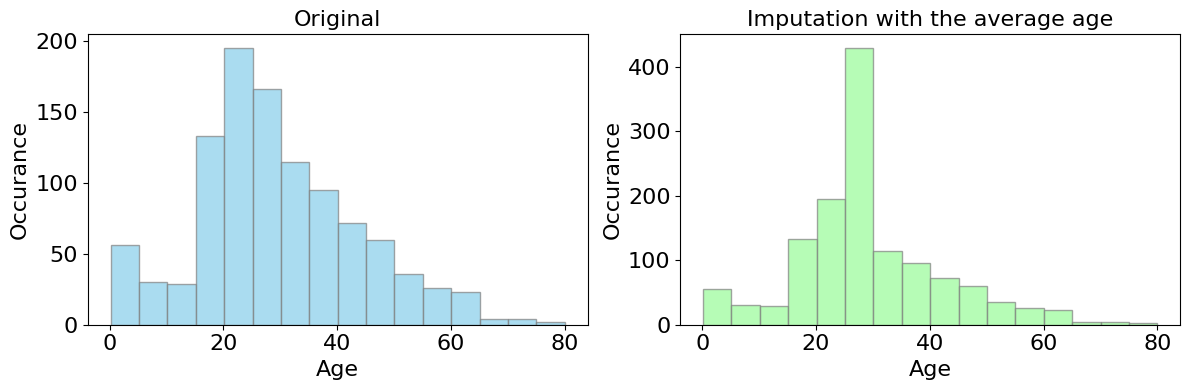

In [20]:
bins = 16
bin_range = (df_all['Age'].min(), df_all['Age'].max() )
fig, axs = plt.subplots(1, 2, figsize=(12, 4))
axs[0].hist(df_all['Age'], bins=bins, range=bin_range, alpha=0.7, color='skyblue', edgecolor='gray')
axs[0].set_title("Original", fontsize=16)
axs[1].hist(df_all_cleaned['Age'], bins=bins, range=bin_range, alpha=0.7, color='palegreen', edgecolor='gray')
axs[1].set_title("Imputation with the average age", fontsize=16)
for i in axs.flatten():
    i.set_xlabel("Age", fontsize=16)
    i.set_ylabel("Occurance", fontsize=16)
    i.tick_params(axis='both', which='major', labelsize=16)
plt.tight_layout()
# plt.savefig("./imputation_age.png")
plt.show()

# final datasets

In [21]:
# split into training and testing
train_final_df = df_all_cleaned_normalized[:891]
testing_final_df = df_all_cleaned_normalized[891:]

# Training with cross validation

Your machine learning models should cover all three categories of feature learning approaches we covered in the class:

Fix-shape universal approximators (kernel methods) from Chapter 12, 

Neural network based universal approximators from Chapter 13, 

Tree-based approaches from Chapter 14. 

You are free to use whatever libraries you are comfortable with to complete the project. 

For example, Scikit-learn provides APIs for common kernel methods, NN, and tree-based approaches. 

It should be sufficient for you to implement the three distinct types of machine learning models in the project and thus is strongly recommended. 

For advanced students who’d like to learn more state-of-the-art libraries, Tensorflow and Pytorch are also popular Machine Learning libraries to use if you are already familiar with their APIs. 


In [57]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import accuracy_score

X = train_final_df
y = train_df["Survived"]
# random_seed_list = [11, 37, 73, 89, 149]
random_seed_list = [11,]
result_summary_rf = []

for random_seed in random_seed_list:
    # Split the dataset into 80% training and 20% testing
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_seed)

    # Define the parameter grid to search
    param_grid = {
        'n_estimators': [50, 100, ],
        'max_depth': [None, 2, 5, ],
        'min_samples_split': [2, 4, 6],
        'min_samples_leaf': [1, 2, 4]
    }

    # Create a random forest classifier
    rf_classifier = RandomForestClassifier(random_state=42)

    # Create a GridSearchCV object
    grid_search = GridSearchCV(rf_classifier, param_grid, cv=5, scoring='accuracy')

    # Fit the GridSearchCV object to the training data
    grid_search.fit(X_train, y_train)

    results_df_rf = pd.DataFrame(grid_search.cv_results_)[['param_max_depth', 'param_min_samples_leaf', \
                                                           'param_min_samples_split', 'param_n_estimators',\
                                                           'mean_test_score', 'std_test_score']]
    results_df_rf['Seed'] = results_df_rf.shape[0]*[random_seed, ]
    column_order = ['Seed'] + [col for col in results_df_rf.columns if col != "Seed" ]
    results_df_rf = results_df_rf[column_order]
    # results_df_rf = results_df_rf.sort_values(by="mean_test_score", ascending=False)
    
    # Access the detailed results
    cv_results = grid_search.cv_results_
    
    # iterate through all models
    all_models = grid_search.cv_results_['params']
    test_acc = []
    for model_params in all_models:
        model = RandomForestClassifier(**model_params, random_state=random_seed)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        # print(f"{model_params}, accuracy: {accuracy}")
        test_acc.append(accuracy)
    results_df_rf["testing_accuracy"] = test_acc
    result_summary_rf.append(results_df_rf)

#     # Get the best parameters from the grid search
#     best_params = grid_search.best_params_
#     print("Best parameters:", best_params)

#     # Use the best parameters to train a new model
#     best_rf_classifier = RandomForestClassifier(**best_params, random_state=random_seed)
#     best_rf_classifier.fit(X_train, y_train)

#     # Make predictions on the test set
#     y_pred = best_rf_classifier.predict(X_test)

#     # Evaluate the model
#     accuracy = accuracy_score(y_test, y_pred)
#     print("Accuracy:", accuracy)
final_results_df = pd.concat(result_summary_rf, ignore_index=True)
final_results_df

,Seed,param_max_depth,param_min_samples_leaf,param_min_samples_split,param_n_estimators,mean_test_score,std_test_score,testing_accuracy
0,11,None,1,2,50,0.780922,0.032289,0.843575
1,11,None,1,2,100,0.786546,0.030065,0.849162
2,11,None,1,4,50,0.814666,0.029228,0.860335
3,11,None,1,4,100,0.816045,0.023354,0.865922
4,11,None,1,6,50,0.818861,0.023751,0.854749
5,11,None,1,6,100,0.817443,0.021021,0.860335
6,11,None,2,2,50,0.823057,0.025060,0.865922
7,11,None,2,2,100,0.814636,0.026639,0.877095
8,11,None,2,4,50,0.823057,0.025060,0.865922
9,11,None,2,4,100,0.814636,0.026639,0.877095


In [111]:
# df_test = results_df_rf.copy()
# df_test = df_test.sort_values(by="testing_accuracy", ascending=False)
final_results_df = final_results_df.sort_values(by="mean_test_score", ascending=False)
final_results_df.to_csv("RF_summary.csv", index=False)


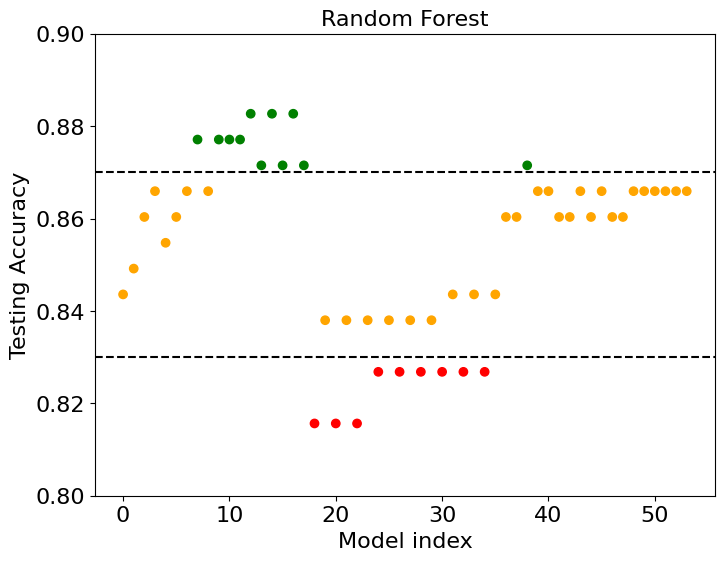

In [123]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
colors = np.where(final_results_df['testing_accuracy']< 0.83, 'red', \
                  np.where((final_results_df['testing_accuracy'] >= 0.83) & (final_results_df['testing_accuracy'] < 0.87), 'orange', 'green'))

ax.scatter(final_results_df.index, final_results_df['testing_accuracy'], c=colors)
ax.set_title("Random Forest", fontsize=16)
ax.set_xlabel("Model index", fontsize=16)
ax.set_ylim([0.8, 0.9])
ax.set_ylabel("Testing Accuracy", fontsize=16)
ax.tick_params(axis='both', which='major', labelsize=16)
ax.axhline(0.83, linestyle="--", color="k")
ax.axhline(0.87, linestyle="--", color="k")
plt.savefig("./RF.png")
plt.show()

In [88]:
print("The best parameters and results: \n", results_df_rf.iloc[0, :] )
best_params_rf = results_df_rf.iloc[0, :]

The best parameters and results: 
 Seed                             11
param_max_depth                None
param_min_samples_leaf            4
param_min_samples_split           6
param_n_estimators               50
mean_test_score             0.83008
std_test_score             0.022173
testing_accuracy           0.882682
Name: 16, dtype: object


In [102]:
final_hyper_params = {
    'max_depth': best_params_rf["param_max_depth"],
    'min_samples_leaf': best_params_rf["param_min_samples_leaf"],
    'min_samples_split': best_params_rf["param_min_samples_split"],
    'n_estimators': best_params_rf["param_n_estimators"]
}

model = RandomForestClassifier(**final_hyper_params, random_state=best_params_rf['Seed'])
model.fit(X, y)
y_pred_submit = model.predict(testing_final_df)

In [103]:
df_submit = pd.DataFrame(columns=["PassengerId", "Survived"])
df_submit["PassengerId"] = [i+1 for i in testing_final_df.index]
df_submit["Survived"] = y_pred_submit
df_submit.to_csv("RF_submit.csv", index=False)

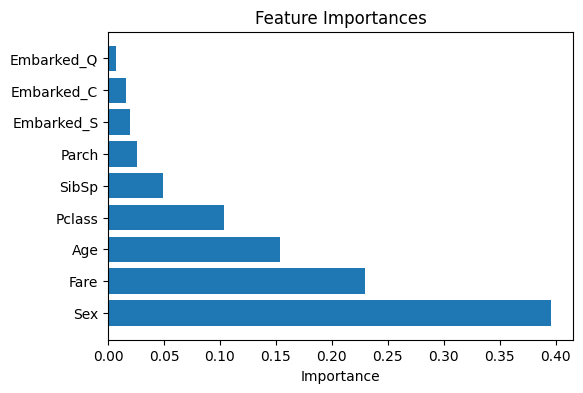

In [107]:
# Get feature importances
feature_importances = model.feature_importances_

# Get the names of features
feature_names = X_train.columns

# Create a DataFrame to visualize feature importances
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(6, 4))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importances')
plt.savefig("./RF_importance.png")
plt.show()

## fix-shape universal approximator (SVM)

{'C': 0.1, 'gamma': 'scale', 'kernel': 'rbf'}, accuracy: 0.8547486033519553
{'C': 0.1, 'gamma': 'auto', 'kernel': 'rbf'}, accuracy: 0.8659217877094972
{'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}, accuracy: 0.8603351955307262
{'C': 1, 'gamma': 'auto', 'kernel': 'rbf'}, accuracy: 0.8603351955307262
{'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}, accuracy: 0.8770949720670391
{'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}, accuracy: 0.8770949720670391

### Final results of SVM kernel method
The best parameters and results: 
 Seed                      11
param_C                   10
param_gamma            scale
param_kernel             rbf
mean_test_score     0.800571
std_test_score      0.023999
testing_accuracy    0.877095
Name: 4, dtype: object


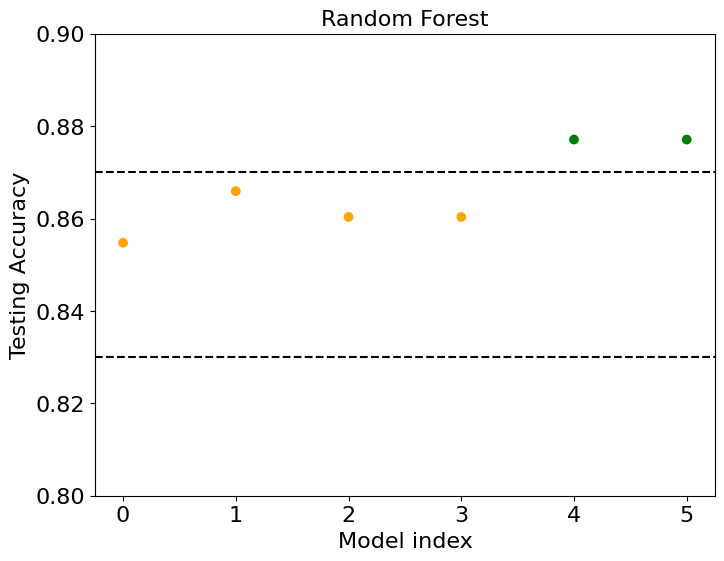

In [125]:
random_seed_list = [11, ]
result_summary_svm = []

for random_seed in random_seed_list:
    # Split the dataset into 80% training and 20% testing
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_seed)

    # Define the parameter grid to search
    param_grid = {
        'C': [0.1, 1, 10],  # Regularization Parameter
        'kernel': ['rbf'],
        # 'degree': [2, 3],  # Only relevant for 'poly' kernel
        'gamma': ['scale', 'auto']  # Only relevant for 'rbf' kernel
    }

    # Create a SVM classifier
    svm_classifier = SVC(random_state=random_seed)

    # Create a GridSearchCV object
    grid_search_svm = GridSearchCV(svm_classifier, param_grid, cv=5, scoring='accuracy')

    # Fit the GridSearchCV object to the training data
    grid_search_svm.fit(X_train, y_train)

    results_df_svm = pd.DataFrame(grid_search_svm.cv_results_)[['param_C', 'param_gamma',\
                                                                'param_kernel', 'mean_test_score', 'std_test_score']]
    results_df_svm['Seed'] = results_df_svm.shape[0]*[random_seed, ]
    column_order = ['Seed'] + [col for col in results_df_svm.columns if col != "Seed" ]
    results_df_svm = results_df_svm[column_order]

    all_models = grid_search_svm.cv_results_['params']
    test_acc = []
    for model_params in all_models:
        model = SVC(**model_params, random_state=random_seed)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        print(f"{model_params}, accuracy: {accuracy}")
        test_acc.append(accuracy)
    results_df_svm["testing_accuracy"] = test_acc
    result_summary_svm.append(results_df_svm)

final_results_svm = pd.concat(result_summary_svm, ignore_index=True)
final_results_svm = final_results_svm.sort_values(by="testing_accuracy", ascending=False)
final_results_svm.to_csv("SVM_summary.csv", index=False)

# Print result and plot
print("\n### Final results of SVM kernel method")
best_params_svm = final_results_svm.iloc[0, :]
print("The best parameters and results: \n", best_params_svm)

fig, ax = plt.subplots(1, 1, figsize=(8, 6))
colors = np.where(final_results_svm['testing_accuracy']< 0.83, 'red', \
                  np.where((final_results_svm['testing_accuracy'] >= 0.83) & (final_results_svm['testing_accuracy'] < 0.87),\
                            'orange', 'green'))
ax.scatter(final_results_svm.index, final_results_svm['testing_accuracy'], c=colors)
ax.set_title("Random Forest", fontsize=16)
ax.set_xlabel("Model index", fontsize=16)
ax.set_ylabel("Testing Accuracy", fontsize=16)
ax.set_ylim([0.8, 0.9])
ax.axhline(0.83, linestyle="--", color="k")
ax.axhline(0.87, linestyle="--", color="k")
ax.tick_params(axis='both', which='major', labelsize=16)
plt.savefig("./SVM.png")
plt.show()

In [126]:
final_hyper_params_svm = {
    'C': best_params_svm["param_C"],
    'gamma': best_params_svm["param_gamma"],
    'kernel': best_params_svm["param_kernel"],
}
model_svc = SVC(**final_hyper_params_svm, random_state=best_params_svm['Seed'])
model_svc.fit(X, y)
y_pred_svm_submit = model_svc.predict(testing_final_df)
df_svm_submit = pd.DataFrame(columns=["PassengerId", "Survived"])
df_svm_submit["PassengerId"] = testing_final_df.index+1
df_svm_submit["Survived"] = y_pred_svm_submit
# df_svm_submit.to_csv("SVM_submit.csv", index=False)
print("\n### Final prediction from the SVM kernel model")
print(df_svm_submit)


### Final prediction from the SVM kernel model
     PassengerId  Survived
0            892         0
1            893         0
2            894         0
3            895         0
4            896         0
..           ...       ...
413         1305         0
414         1306         1
415         1307         0
416         1308         0
417         1309         0

[418 rows x 2 columns]


<Figure size 800x600 with 0 Axes>

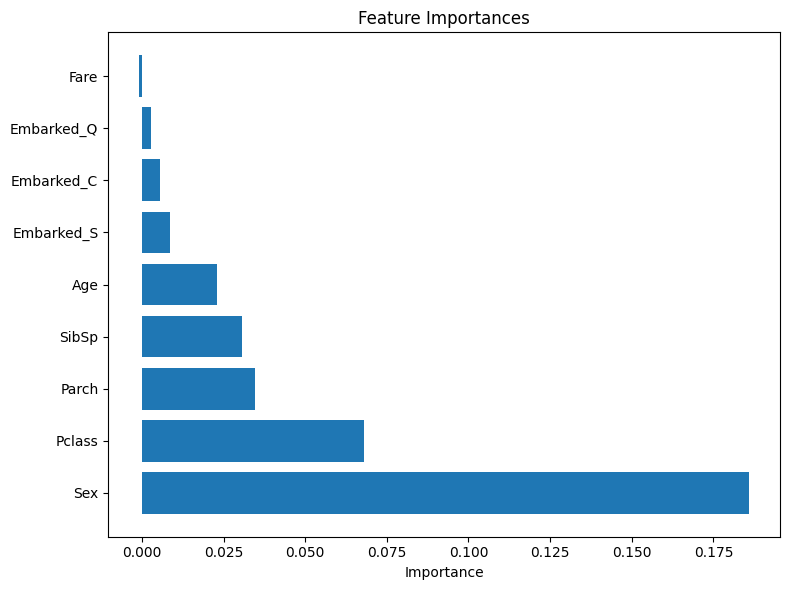

In [128]:
result = permutation_importance(model_svc, X, y, n_repeats=30, random_state=best_params_svm['Seed'])
importance_svm = result.importances_mean
feature_names_svm = X.columns
plt.figure(figsize=(8, 6))
importance_df_svm = pd.DataFrame({'Feature': feature_names_svm, 'Importance': importance_svm})
importance_df_svm = importance_df_svm.sort_values(by='Importance', ascending=False)
plt.figure(figsize=(8, 6))
plt.barh(importance_df_svm['Feature'], importance_df_svm['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importances')
plt.tight_layout()

## Neutral network

In [137]:
X = train_final_df
y = train_df["Survived"]
# try more random seed if you want
# random_seed_list = [11, 37, 73, 89, 149]
random_seed_list = [11, ]
result_summary_nn = []

for random_seed in random_seed_list:
    # Split the dataset into 80% training and 20% testing
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_seed)

    # Create a neural network classifier
    nn_classifier = MLPClassifier(random_state=random_seed)

    # Cross-validation to search for optimal hyperparameters
    param_grid = {
        'hidden_layer_sizes': [(10,), (20,), (30,), (5, 10)],
        'alpha': [0.0001, 0.001],
        'learning_rate_init': [0.1, 0.01],
        'max_iter': [500],
    }

    # Using 'accuracy' as the scoring metric, adjust as needed
    grid_search_nn = GridSearchCV(nn_classifier, param_grid, cv=5, scoring='accuracy')
        # Fit the GridSearchCV object to the training data
        
    grid_search_nn.fit(X_train, y_train)

    results_df_nn = pd.DataFrame(grid_search_nn.cv_results_)[['param_alpha', 'param_hidden_layer_sizes', \
                                                           'param_learning_rate_init', 'param_max_iter',\
                                                           'mean_test_score', 'std_test_score']]
    results_df_nn['Seed'] = results_df_nn.shape[0]*[random_seed, ]
    column_order = ['Seed'] + [col for col in results_df_nn.columns if col != "Seed" ]
    results_df_nn = results_df_nn[column_order]
    # results_df_rf = results_df_rf.sort_values(by="mean_test_score", ascending=False)
    
    # iterate through all models
    all_models = grid_search_nn.cv_results_['params']
    test_acc = []
    for model_params in all_models:
        model = MLPClassifier(**model_params, random_state=random_seed)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        # print(f"{model_params}, accuracy: {accuracy}")
        test_acc.append(accuracy)
    results_df_nn["testing_accuracy"] = test_acc
    result_summary_nn.append(results_df_nn)

final_results_nn = pd.concat(result_summary_nn, ignore_index=True)
final_results_nn = final_results_nn.sort_values(by="testing_accuracy", ascending=False)
final_results_nn.to_csv("NN_summary.csv", index=False)

In [138]:
final_results_nn

,Seed,param_alpha,param_hidden_layer_sizes,param_learning_rate_init,param_max_iter,mean_test_score,std_test_score,testing_accuracy
13,11,0.001,"(30,)",0.01,500,0.785128,0.044416,0.877095
5,11,0.0001,"(30,)",0.01,500,0.799153,0.044014,0.871508
9,11,0.001,"(10,)",0.01,500,0.793519,0.041111,0.871508
1,11,0.0001,"(10,)",0.01,500,0.797735,0.041506,0.865922
3,11,0.0001,"(20,)",0.01,500,0.803398,0.038782,0.865922
8,11,0.001,"(10,)",0.1,500,0.794918,0.036333,0.865922
11,11,0.001,"(20,)",0.01,500,0.806215,0.032502,0.865922
12,11,0.001,"(30,)",0.1,500,0.790761,0.041803,0.865922
14,11,0.001,"(5, 10)",0.1,500,0.789314,0.022359,0.865922
0,11,0.0001,"(10,)",0.1,500,0.794928,0.025043,0.860335



### Final results of Neural Network method
The best parameters and results: 
 Seed                              11
param_alpha                    0.001
param_hidden_layer_sizes       (30,)
param_learning_rate_init        0.01
param_max_iter                   500
mean_test_score             0.785128
std_test_score              0.044416
testing_accuracy            0.877095
Name: 13, dtype: object


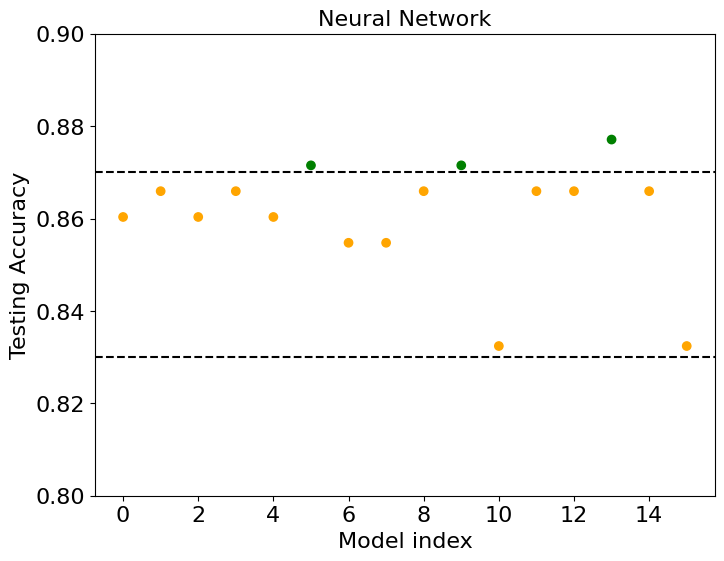

In [139]:
print("\n### Final results of Neural Network method")
best_params_nn = final_results_nn.iloc[0, :]
print("The best parameters and results: \n", best_params_nn)

fig, ax = plt.subplots(1, 1, figsize=(8, 6))
colors = np.where(final_results_nn['testing_accuracy']< 0.83, 'red', \
                  np.where((final_results_nn['testing_accuracy'] >= 0.83) & (final_results_nn['testing_accuracy'] < 0.87),\
                            'orange', 'green'))
ax.scatter(final_results_nn.index, final_results_nn['testing_accuracy'], c=colors)
ax.set_title("Neural Network", fontsize=16)
ax.set_xlabel("Model index", fontsize=16)
ax.set_ylabel("Testing Accuracy", fontsize=16)
ax.set_ylim([0.8, 0.9])
ax.axhline(0.83, linestyle="--", color="k")
ax.axhline(0.87, linestyle="--", color="k")
ax.tick_params(axis='both', which='major', labelsize=16)
plt.savefig("./NN.png")
plt.show()

In [141]:
best_params_nn

Seed                              11
param_alpha                    0.001
param_hidden_layer_sizes       (30,)
param_learning_rate_init        0.01
param_max_iter                   500
mean_test_score             0.785128
std_test_score              0.044416
testing_accuracy            0.877095
Name: 13, dtype: object

In [144]:
final_hyper_params_nn = {
    'alpha': best_params_nn["param_alpha"],
    'hidden_layer_sizes': best_params_nn['param_hidden_layer_sizes'],  
    'learning_rate_init': best_params_nn['param_learning_rate_init'],
    'max_iter': best_params_nn['param_max_iter']
}
model_nn = MLPClassifier(**final_hyper_params_nn, random_state=best_params_nn['Seed'])
model_nn.fit(X, y)
y_pred_nn_submit = model_nn.predict(testing_final_df)
df_nn_submit = pd.DataFrame(columns=["PassengerId", "Survived"])
df_nn_submit["PassengerId"] = testing_final_df.index+1
df_nn_submit["Survived"] = y_pred_nn_submit
df_nn_submit.to_csv("NN_submit.csv", index=False)
print("\n### Final prediction from the Neural Network model")
print(df_nn_submit)


### Final prediction from the Neural Network model
     PassengerId  Survived
0            892         0
1            893         0
2            894         0
3            895         0
4            896         0
..           ...       ...
413         1305         0
414         1306         1
415         1307         0
416         1308         0
417         1309         0

[418 rows x 2 columns]
